In [1]:
import numpy as np
import pandas as pd

In [2]:
x = pd.read_csv("./DDI/data5/x.csv", index_col=0)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,0.048905,0.011679,0.001975,0.021766,0.067953,0.037869,0.031675,0.019814,0.004830,0.083814,...,0.002892,0.048984,0.029960,0.039517,0.019952,0.034073,0.005839,0.005744,0.015549,0.031381
1,0.049622,0.011937,0.002033,0.022423,0.067662,0.041857,0.033858,0.018942,0.004744,0.081488,...,0.003578,0.049885,0.027282,0.038969,0.020614,0.035464,0.006810,0.005767,0.014316,0.032913
2,0.049377,0.012678,0.002111,0.022569,0.071262,0.037874,0.033509,0.015293,0.005129,0.080742,...,0.002363,0.045649,0.030092,0.038292,0.021105,0.034499,0.005615,0.004780,0.013970,0.031146
3,0.049119,0.012059,0.002043,0.021865,0.067989,0.039044,0.032324,0.019768,0.004840,0.083220,...,0.002366,0.051522,0.028062,0.037822,0.020210,0.031624,0.006413,0.005942,0.015166,0.032682
4,0.050868,0.011680,0.002006,0.021329,0.067009,0.039194,0.031737,0.020214,0.005168,0.081305,...,0.003031,0.051998,0.028592,0.038804,0.018502,0.032700,0.007472,0.006499,0.014712,0.030189


In [3]:
y = pd.read_csv("./DDI/data5/y.csv", index_col=0)
y.head()

,0
0,1
1,3
2,2
3,0
4,0


In [4]:
x.shape, y.shape

((10000, 2080), (10000, 1))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9000, 2080), (1000, 2080), (9000, 1), (1000, 1))

In [284]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [285]:
acc_knn

0.656

In [286]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred)
acc_dt

0.54

In [287]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_rc = accuracy_score(y_test, y_pred)
acc_rc

c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.578

In [66]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, BatchNormalization, LSTM, MaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping

In [277]:
y_train_one_hot = []
for i in range(len(y_train)):
    curr = np.zeros(65, dtype='float32')
    curr[y_train.iloc[i, 0]] = 1
    y_train_one_hot.append(curr)

y_train_one_hot = np.array(y_train_one_hot)

y_test_one_hot = []
for i in range(len(y_test)):
    curr = np.zeros(65, dtype='float32')
    curr[y_test.iloc[i, 0]] = 1
    y_test_one_hot.append(curr)

y_test_one_hot = np.array(y_test_one_hot)

y_train_one_hot.shape, y_test_one_hot.shape

((9000, 65), (1000, 65))

In [70]:
def DNN():
    train_input = Input(shape=(2080,), name='Inputlayer')
    train_in = Dense(512, activation='relu')(train_input)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(0.3)(train_in)
    train_in = Dense(256, activation='relu')(train_in)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(0.3)(train_in)
    train_in = Dense(65)(train_in)
    out = Activation('softmax')(train_in)
    model = Model(inputs=train_input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # binary_crossentropy
    return model

In [71]:
dnn = DNN()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
history = dnn.fit(x_train, y_train_one_hot, batch_size=128, epochs=100,
        validation_data=(x_test, y_test_one_hot),
        callbacks=[early_stopping])
y_pred = dnn.predict(x_test)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3574 - loss: 3.0939 - val_accuracy: 0.3160 - val_loss: 3.5607
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5834 - loss: 1.6455 - val_accuracy: 0.3950 - val_loss: 2.9663
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6481 - loss: 1.3044 - val_accuracy: 0.3515 - val_loss: 2.6140
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6720 - loss: 1.1599 - val_accuracy: 0.4580 - val_loss: 2.4077
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6958 - loss: 1.0269 - val_accuracy: 0.3750 - val_loss: 2.2494
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7121 - loss: 0.9170 - val_accuracy: 0.3725 - val_loss: 2.0515
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7307 - loss: 0.8565 - val_accuracy: 0.4640 - val_loss: 1.8372
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7419 - loss: 0.7880 - val_accuracy: 0.

In [140]:
dnn.save("./models/dnn.h5")

In [291]:
def one_hot_decode(y):
    res = []
    for row in y:
        res.append(row.argmax())
    return res

In [311]:
y_pred = dnn.predict(x_test)
y_pred = one_hot_decode(y_pred)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 3,
 6,
 15,
 0,
 2,
 17,
 3,
 24,
 8,
 0,
 1,
 0,
 0,
 7,
 4,
 6,
 3,
 2,
 2,
 1,
 0,
 10,
 4,
 3,
 1,
 4,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 9,
 16,
 2,
 3,
 2,
 3,
 1,
 39,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 35,
 2,
 2,
 2,
 2,
 0,
 6,
 1,
 4,
 7,
 3,
 2,
 11,
 2,
 18,
 7,
 1,
 6,
 1,
 9,
 2,
 2,
 24,
 2,
 7,
 2,
 2,
 2,
 6,
 2,
 1,
 2,
 8,
 0,
 7,
 2,
 1,
 0,
 5,
 1,
 9,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 0,
 2,
 2,
 2,
 28,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 6,
 2,
 2,
 0,
 3,
 3,
 7,
 2,
 1,
 3,
 1,
 2,
 2,
 5,
 1,
 3,
 29,
 40,
 2,
 1,
 1,
 3,
 3,
 6,
 0,
 0,
 0,
 6,
 2,
 7,
 1,
 2,
 1,
 4,
 3,
 2,
 2,
 0,
 2,
 21,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 6,
 1,
 8,
 7,
 0,
 2,
 5,
 2,
 2,
 1,
 1,
 0,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 10,
 2,
 2,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 1,
 4,
 2,
 3,
 0,
 7,
 7,
 7,
 1,
 0,
 13,
 16,
 2,
 2,
 2,
 2,
 1,
 7,
 2,
 5,
 5,
 2,
 3,
 0,
 2,
 1,
 3,

In [73]:
def get_dnn_acc(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if(y_test[i].argmax() == y_pred[i].argmax()):
            correct += 1
    acc = correct / len(y_test)
    return acc

In [74]:
acc_dnn = get_dnn_acc(y_test_one_hot, y_pred)
acc_dnn

0.582

In [ ]:
import tensorflow as tf
import math

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_weights = tf.Variable(tf.random.uniform([input_size, hidden_size], dtype='double', minval=0.1, maxval=100), trainable=False)
        self.biases = tf.Variable(tf.random.uniform([hidden_size], dtype='double', minval=0.1, maxval=10), trainable=False)
        self.output_weights = None

    def hidden_layer_output(self, X):
        H = tf.matmul(X, self.input_weights) + self.biases
        H = tf.nn.relu(H)
        return H

    def fit(self, X_train, Y_train):
        H = self.hidden_layer_output(X_train)
        
        H_pinv = tf.linalg.pinv(H)
        self.output_weights = tf.matmul(H_pinv, Y_train)

    def predict(self, X):
        H = self.hidden_layer_output(X)
        return tf.matmul(H, self.output_weights)

input_size = 2080
hidden_size = 2048
output_size = 65

elm = ELM(input_size, hidden_size, output_size)

elm.fit(x_train, y_train_one_hot)

In [ ]:
y_pred = elm.predict(x_test)
y_pred = one_hot_decode(np.array(y_pred))
print(y_pred)

[0, 0, 1, 0, 0, 2, 0, 1, 1, 3, 6, 15, 0, 2, 17, 2, 9, 8, 0, 1, 0, 0, 7, 4, 6, 0, 10, 0, 1, 0, 10, 4, 3, 1, 4, 2, 0, 1, 4, 2, 7, 1, 1, 4, 6, 1, 1, 9, 16, 1, 3, 6, 2, 1, 5, 0, 0, 1, 0, 2, 0, 5, 3, 4, 1, 0, 0, 10, 4, 25, 0, 2, 2, 2, 6, 0, 0, 4, 1, 1, 7, 0, 2, 11, 2, 18, 7, 1, 6, 1, 9, 1, 1, 0, 1, 7, 1, 2, 2, 1, 0, 1, 0, 8, 0, 1, 0, 7, 0, 5, 1, 9, 1, 1, 0, 1, 1, 2, 3, 9, 0, 0, 2, 2, 28, 1, 1, 2, 1, 3, 3, 1, 3, 0, 6, 2, 2, 0, 3, 8, 7, 2, 1, 35, 1, 1, 0, 5, 0, 3, 29, 40, 1, 4, 1, 3, 2, 1, 0, 0, 0, 6, 2, 7, 1, 7, 1, 4, 1, 2, 2, 0, 2, 21, 1, 0, 1, 1, 10, 0, 1, 1, 1, 8, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 20, 1, 1, 1, 0, 7, 0, 1, 2, 2, 0, 1, 1, 2, 0, 4, 0, 2, 0, 3, 2, 2, 0, 1, 0, 1, 4, 2, 1, 0, 25, 7, 1, 1, 0, 0, 1, 0, 11, 2, 1, 1, 7, 2, 1, 1, 0, 3, 0, 0, 1, 3, 2, 8, 7, 6, 0, 1, 2, 8, 2, 2, 5, 3, 1, 0, 1, 0, 1, 40, 0, 9, 7, 4, 3, 9, 1, 0, 3, 1, 0, 6, 17, 3, 4, 1, 3, 0, 1, 7, 0, 0, 7, 0, 0, 0, 3, 0, 1, 1, 2, 0, 7, 2, 0, 4, 0, 7, 1, 0, 0, 2, 0, 1, 10, 1, 13, 6, 1, 1, 9, 2, 2, 2, 21, 1, 1, 1, 2, 2, 7, 1

In [280]:
acc_elm = get_dnn_acc(y_test_one_hot, np.array(y_pred))
acc_elm

0.847

In [281]:
y_pred = elm.predict(x_train)
acc_elm_training = get_dnn_acc(y_train_one_hot, np.array(y_pred))
acc_elm_training

0.9256666666666666

In [7]:
import matplotlib.pyplot as plt

In [282]:
dnn_acc_training = history.history['accuracy'][-1]
dnn_acc_training

0.8707500100135803

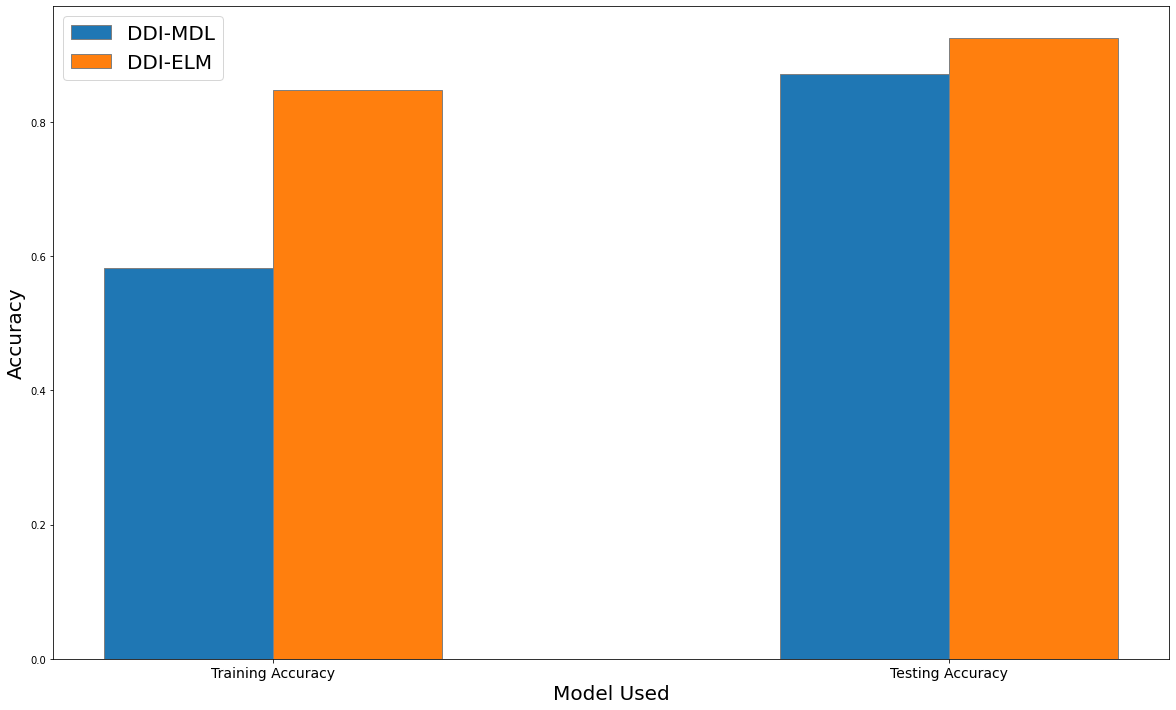

In [10]:
barWidth = 0.25
fig = plt.subplots(figsize =(20, 12))

dnn_params = [acc_dnn, dnn_acc_training]
elm_parmas = [acc_elm, acc_elm_training]

br1 = np.arange(len(dnn_params)) 
br2 = [x + barWidth for x in br1]

plt.bar(br1, dnn_params, width = barWidth, 
        edgecolor ='grey', label ='DDI-MDL') 
plt.bar(br2, elm_parmas, width = barWidth, 
        edgecolor ='grey', label ='DDI-ELM')

plt.xlabel('Model Used', fontsize = 20) 
plt.ylabel('Accuracy', fontsize = 20) 
plt.xticks([r + (barWidth/2) for r in range(len(dnn_params))], 
        ['Training Accuracy', 'Testing Accuracy'],fontsize = 14)

plt.legend(prop = { "size": 20 })
plt.show() 

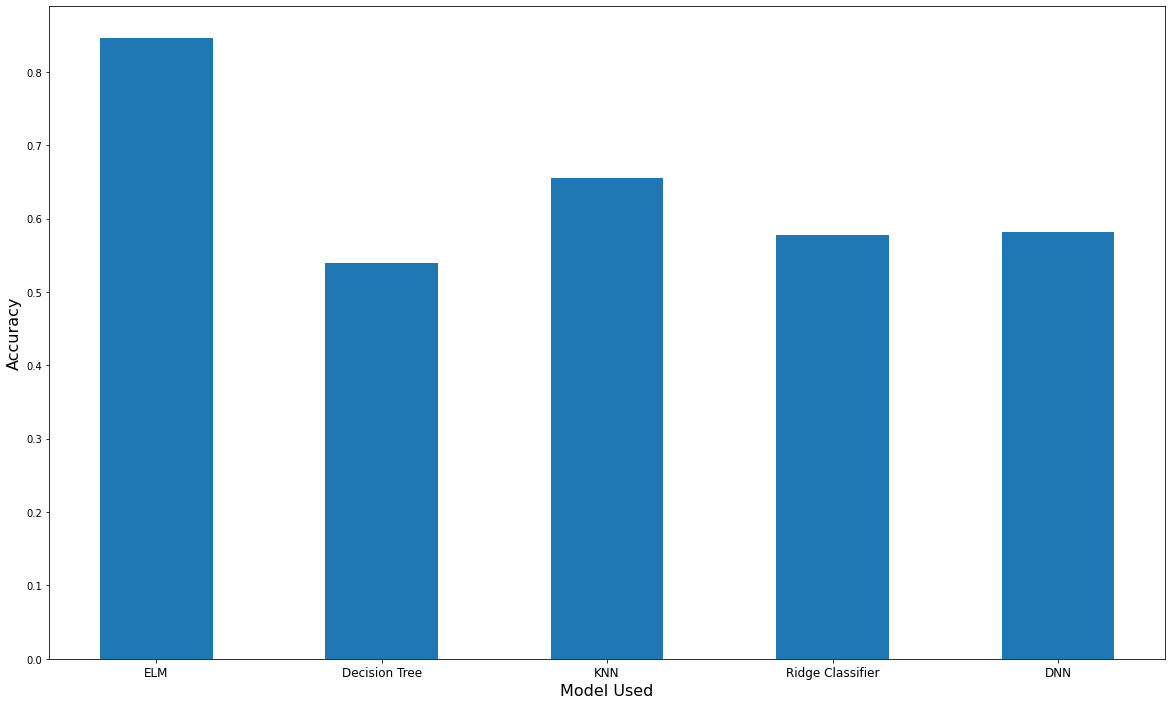

In [12]:
fig = plt.subplots(figsize =(20, 12))
barWidth = 0.5

acc_list = [acc_elm, acc_dt, acc_knn, acc_rc, acc_dnn]

br1 = np.arange(len(acc_list))

plt.bar(br1, acc_list, width=barWidth)

plt.xlabel('Model Used', fontsize = 16) 
plt.ylabel('Accuracy', fontsize = 16) 
plt.xticks([r for r in range(len(acc_list))], 
        ['ELM', 'Decision Tree', 'KNN', 'Ridge Classifier', 'DNN'], fontsize=12)

plt.show() 

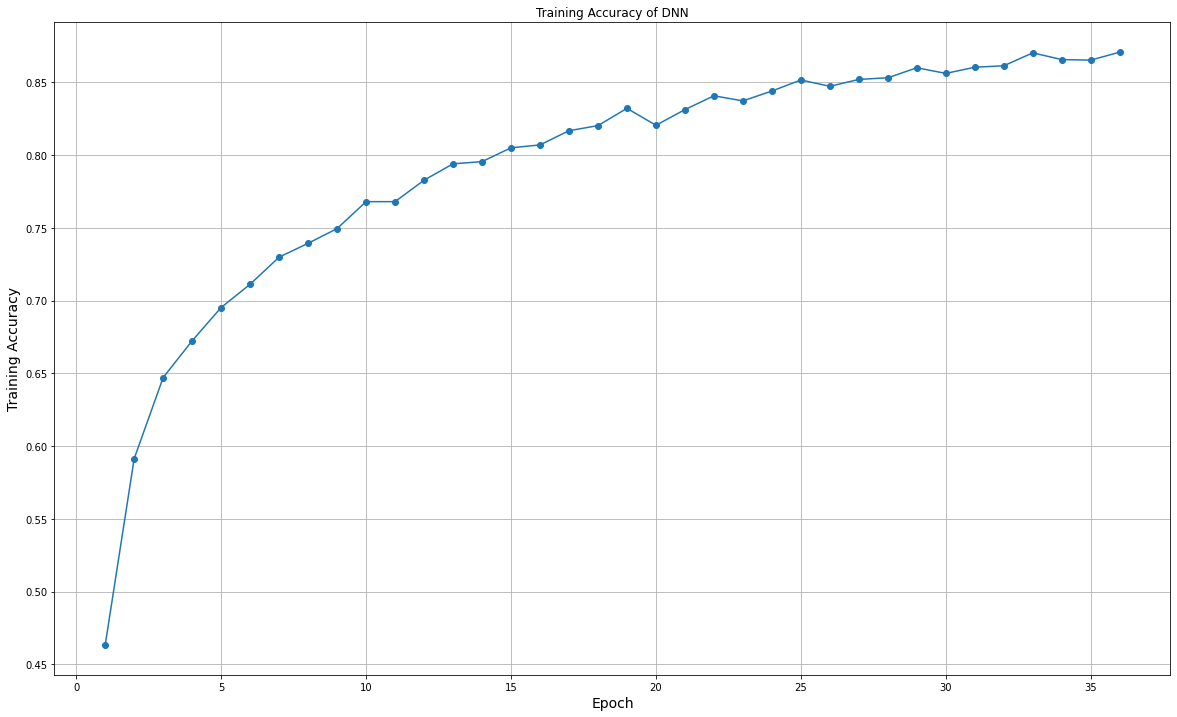

In [ ]:
y_pos = history.history['accuracy']
x_pos = [i+1 for i in range(len(y_pos))]

plt.figure(figsize=(20, 12))
plt.plot(x_pos, y_pos, marker='o', linestyle='-')

plt.title('Training Accuracy of DNN')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Accuracy', fontsize=14)

plt.grid(True)

plt.show()

In [290]:
acc_elm, acc_elm_training, acc_dnn, dnn_acc_training

(0.777, 0.9056666666666666, 0.582, 0.8707500100135803)

In [ ]:
from sklearn.metrics import classification_report

# DNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64       228
           1       0.87      0.42      0.57       219
           2       0.38      0.95      0.54       153
           3       0.51      0.93      0.66        82
           4       0.90      0.62      0.74        45
           5       0.60      1.00      0.75        12
           6       0.70      0.38      0.49        42
           7       0.73      0.71      0.72        51
           8       0.68      0.87      0.76        15
           9       1.00      0.79      0.88        29
          10       1.00      0.55      0.71        11
          11       1.00      0.38      0.56        13
          12       1.00      1.00      1.00         2
          13       0.67      0.67      0.67         3
          14       0.00      0.00      0.00         5
          15       1.00      0.80      0.89         5
          16       1.00      0.83      0.91         6
          17       1.00    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ELM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       228
           1       0.71      0.84      0.77       219
           2       0.81      0.76      0.78       153
           3       0.93      0.77      0.84        82
           4       0.81      0.67      0.73        45
           5       0.77      0.83      0.80        12
           6       0.54      0.48      0.51        42
           7       0.79      0.88      0.83        51
           8       0.78      0.93      0.85        15
           9       0.89      0.83      0.86        29
          10       0.75      0.55      0.63        11
          11       0.79      0.85      0.81        13
          12       0.67      1.00      0.80         2
          13       1.00      0.33      0.50         3
          14       0.00      0.00      0.00         5
          15       1.00      0.80      0.89         5
          16       1.00      0.50      0.67         6
          17       0.75    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Rec

In [299]:
clf_report = classification_report(y_test, y_pred, output_dict=True)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Rec

In [313]:
import seaborn as sns

<AxesSubplot:>

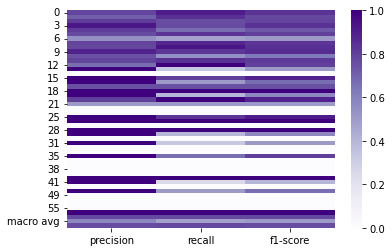

In [ ]:
# ELM
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Purples")

<AxesSubplot:>

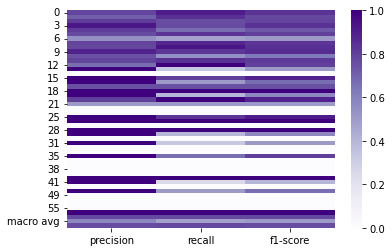

In [ ]:
# DNN
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap="Purples")